In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib as mpl

In [2]:
data = pd.read_csv('clustering-datasets.csv')

In [3]:
data

,overall,potential
0,94,94
1,93,93
2,92,92
3,91,93
4,91,91
...,...,...
18273,48,56
18274,48,56
18275,48,56
18276,48,54


In [4]:
data.describe()

,overall,potential
count,18278.000000,18278.000000
mean,66.244994,71.546887
std,6.949953,6.139669
min,48.000000,49.000000
25%,62.000000,67.000000
50%,66.000000,71.000000
75%,71.000000,75.000000
max,94.000000,95.000000


In [5]:
missing_values = data.isnull().sum()
missing_values

overall      0
potential    0
dtype: int64

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

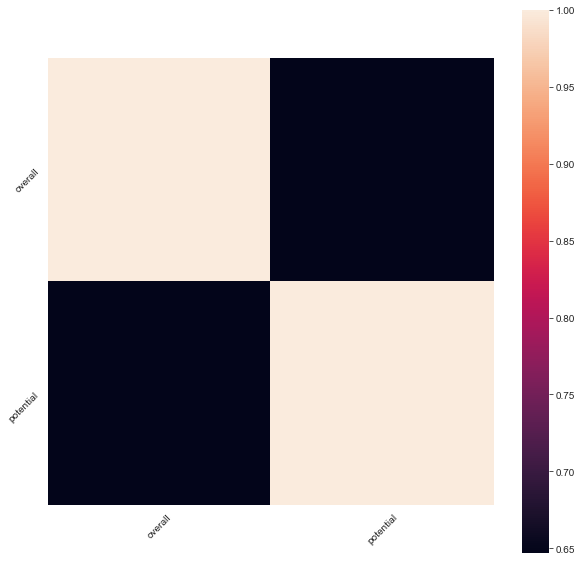

In [6]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [7]:
def boxPlot(data1, data2):
    mpl.rcParams['figure.dpi'] = 100
    plt.figure(figsize=(60, 60))
    f, axes = plt.subplots(1, 2)
    sns.boxplot(y=data1, ax=axes[0])
    sns.boxplot(y=data2, ax=axes[1])
    plt.subplots_adjust(wspace=1)

<Figure size 6000x6000 with 0 Axes>

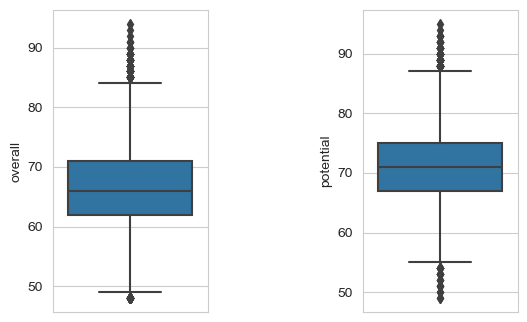

In [8]:
boxPlot(data["overall"], data["potential"])

In [9]:
def setbound(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    print(Q1, Q3)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [10]:
def getOutlierData(data, mainData):
    lowerbound,upperbound = setbound(data)
    return mainData[(data < lowerbound) | (data > upperbound)]

In [11]:
def outliering(data1, data2, mainData):
    while True:
        lowerbound,upperbound = setbound(data1)
        res1 = getOutlierData(data1, mainData)
#         print(getOutlierData(data1, mainData))

        lowerbound,upperbound = setbound(data2)
#         print(getOutlierData(data2, mainData))
        res2 = getOutlierData(data2, mainData)
        
        res = pd.concat([res1,res2]).drop_duplicates()
        res = res.index

        print('Total Outliers = ',len(res))
        print('=== The Outliers ===')
        print(res)    
        mainData.drop(res, inplace=True)

        if(len(res)==0):
            break
    print("BLOXPOT AFTER OUTLIERING")
    boxPlot(mainData['overall'], mainData['potential'])
    return mainData

62.0 71.0
62.0 71.0
67.0 75.0
67.0 75.0
Total Outliers =  94
=== The Outliers ===
Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,    10,
               11,    14,    16,    23,    24,    26,    27,    29,    40,
               42,    43,    44,    55,    56,    58,    60,    62,    64,
               73,    74,    75,    76,    80,    85,    86,    87,    96,
            18235, 18237, 18238, 18240, 18241, 18242, 18247, 18249, 18256,
            18258, 18260, 18262, 18264, 18271, 18272, 18273, 18276, 18277,
              108,   110,   111,   116,   157,   158,   162,   237,   238,
              329,   332,   411,   412,   568,   569,   571,   753,   754,
              992,  1254,  1255,  1257,  1615,  2121,  2122,  3288,  4041,
             4756, 17580, 17777, 17945, 17946, 18064, 18065, 18164, 18165,
            18167, 18230, 18232, 18233],
           dtype='int64')
62.0 71.0
62.0 71.0
67.0 75.0
67.0 75.0
Total Outliers =  49
=== The Outliers ===
Int64Index([    5, 

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 6000x6000 with 0 Axes>

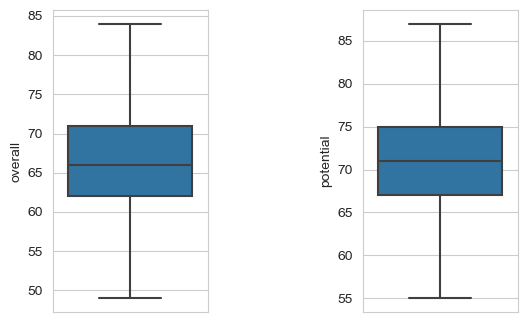

In [12]:
newData = outliering(data["overall"], data["potential"], data)

In [13]:
newData

,overall,potential
120,84,87
121,84,87
122,84,86
123,84,86
124,84,86
...,...,...
18225,49,56
18226,49,56
18227,49,56
18228,49,55


Text(0, 0.5, 'potential')

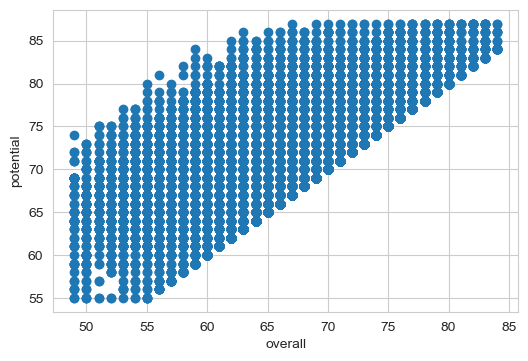

In [14]:
plt.scatter(newData['overall'], newData['potential'])
plt.xlabel('overall')
plt.ylabel('potential')

In [15]:
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(newData)
print(model.cluster_centers_)

[[64.74823432 66.67739925]
 [70.5821236  72.90273745]
 [75.97859691 80.46848989]
 [56.11348563 64.89314665]
 [62.24503937 74.83401575]]


In [16]:
labels = model.predict(newData)
centroids = model.cluster_centers_
print(len(labels))

18048


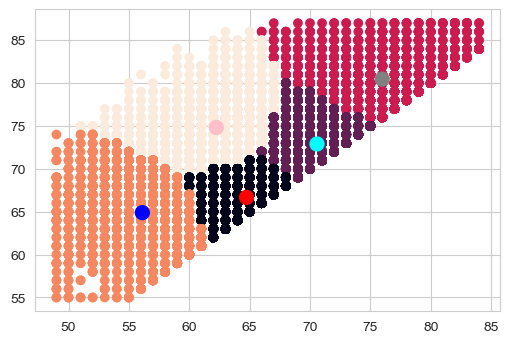

In [17]:
plt.scatter(newData['overall'],newData['potential'], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color=["red", 'cyan', 'gray', 'blue', 'pink']);

In [18]:
k=3

In [19]:
def generateCentroids(k, data1, data2):
    # Randomize value from 0 until max of data depend on size of k
    xCentroids = np.random.randint(0, np.max(data1), size=k)
    yCentroids = np.random.randint(0, np.max(data2), size=k) 
    
    # Merge X and Y Centroids
    centroids = np.array(list(zip(xCentroids, yCentroids)))
    return centroids, xCentroids, yCentroids

In [20]:
centroids, x, y = generateCentroids(k,newData['overall'],newData['potential'])

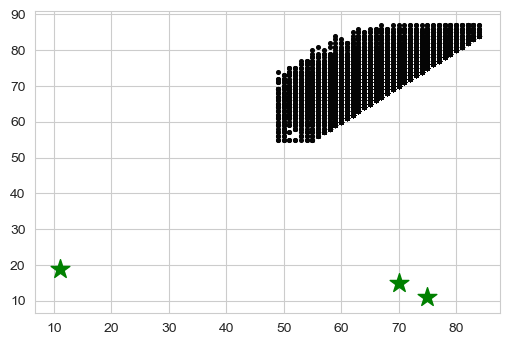

In [21]:
plt.scatter(newData['overall'], newData['potential'], c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='g')

In [22]:
# assign first centroid as 0
oldCentroid = np.zeros(centroids.shape)
print(oldCentroid)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [23]:
# assign cluster label to zero
clusters = np.zeros(len(newData))
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
# Euclidean Distance Caculator
def euclideanDistance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [25]:
# Error func. - Distance between new centroids and old centroids
error = euclideanDistance(centroids, oldCentroid, None)
error

106.55045753069294

In [26]:
npData = np.array(newData)

In [27]:
npData

array([[84, 87],
       [84, 87],
       [84, 86],
       ...,
       [49, 56],
       [49, 55],
       [49, 55]], dtype=int64)

In [28]:
from copy import deepcopy

In [29]:
def updateCentroids(idx, clusters, data):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == idx])
    return points

In [30]:
def kMeans(data, centroids, error, k):
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(data)):
#             print("CENTROID : ",centroids)
#             print("Data : ",data[i])
            distances = euclideanDistance(data[i], centroids)
#             print("DISTANCES ",distances)
            cluster = np.argmin(distances)
#             print("CLUSTER ",cluster)
            clusters[i] = cluster
            
        # Storing the old centroid values
        oldCentroid = deepcopy(centroids)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = updateCentroids(i, clusters, data)
            print(points)
            centroids[i] = np.mean(points, axis=0)
        error = euclideanDistance(centroids, oldCentroid, None)
        print(error)
    return centroids, clusters

In [36]:
np.mean([[],[2,2]], axis=0)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [31]:
lastCentroids, clusters = kMeans(npData, centroids, error, k)

[]
[]
[[84 87]
 [84 87]
 [84 86]
 ...
 [49 56]
 [49 55]
 [49 55]]
4294967238.000001


C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]
[]
[[84 87]
 [84 87]
 [84 86]
 ...
 [49 56]
 [49 55]
 [49 55]]
0.0


In [32]:
lastCentroids

array([[-2147483648, -2147483648],
       [-2147483648, -2147483648],
       [         66,          71]])

In [67]:
clusters

array([1., 1., 1., ..., 2., 2., 2.])

In [407]:
count = 0
for i in clusters:
    if(i == 1):
        count+=1
count

8870

In [450]:
lastCentroids

array([[         70,          75],
       [         60,          66],
       [-2147483648, -2147483648]])

0
[[84 87]
 [84 87]
 [84 86]
 ...
 [58 79]
 [57 80]
 [56 81]]
1
[[67 68]
 [67 68]
 [67 68]
 ...
 [49 56]
 [49 55]
 [49 55]]
2
[]


IndexError: too many indices for array

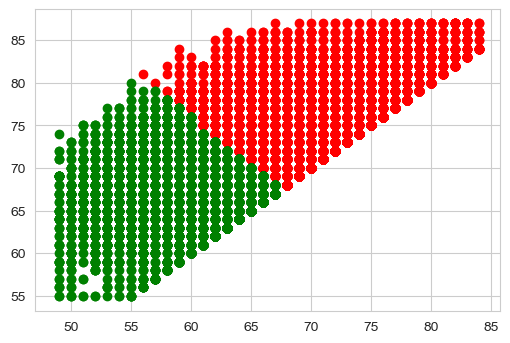

In [451]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = updateCentroids(i, clusters, npData)
        print(i)
        print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])

plt.scatter(lastCentroids[:, 0], lastCentroids[:, 1], marker='*', c='#050505')